# Simple Linear Regression


In [0]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pylab as plt
from google.colab import drive 
from sklearn.model_selection import train_test_split


In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/)
# !wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip"
# !unzip "CCPP.zip"

## Data Cleaning, Processing, Visualisation

1. **The rows with missing values is dropped**
2. **Scatter plot and Heat Map**
3. **Test Size Ratio = 30%**

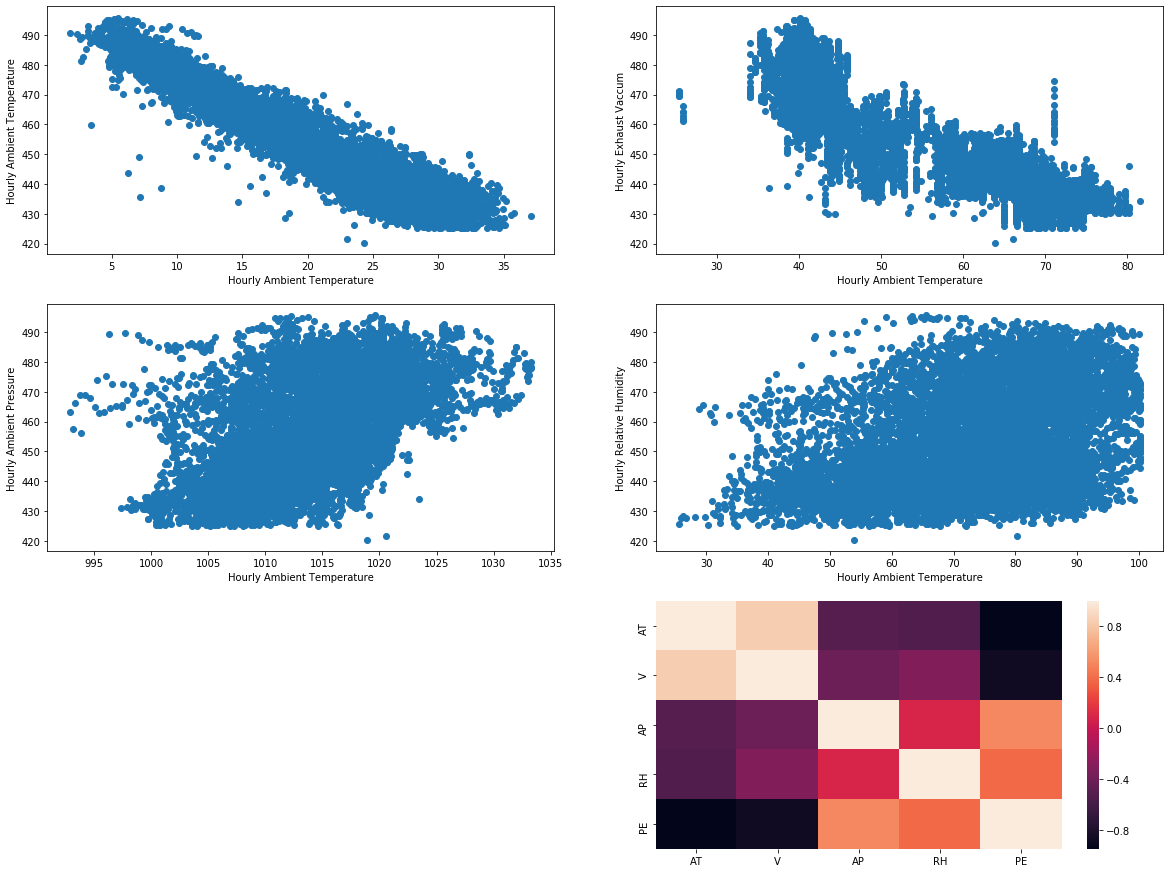

Shape of Train X = (6696, 4, 1) , Train Y = (6696, 1)
Shape of Test X = (2871, 4, 1) , Test Y = (2871, 1)


In [138]:
def visualize_data(data_df):

    plt.figure(figsize=(20,15))
    plt.subplots_adjust(bottom = 0.1)

    var_name = ['AT','V','AP','RH']
    var_desc = ['Hourly Ambient Temperature','Hourly Exhaust Vaccum','Hourly Ambient Pressure','Hourly Relative Humidity']

    # sns.pairplot(x_vars=['AT','V','AP','RH'],y_vars=['PE'],data=data_df,kind='reg')
    for i in range(4):
      plt.subplot(3,2,i+1)
      plt.scatter(data_df[var_name[i]], data_df['PE'])
      plt.xlabel('Hourly Ambient Temperature')
      plt.ylabel(var_desc[i])

    plt.subplot(3,2,6)
    sns.heatmap(data_df.corr())

    plt.show()

def get_data(filename,test_size):
    """
        Returns train_df , val_df, test_df , dict_map
        filename     : Relative filename of the directory
        test_size    : Test Size
    """
    
    data = pd.read_excel(filename)

    data = data.dropna()

    visualize_data(data)

    data_y = data['PE']
    data_x = data.drop(columns='PE')

    data_x = data_x.values.reshape(-1,4,1)
    data_y = data_y.values.reshape(-1,1)

    train = { 'x' : [] , 'y' : [] }
    test = { 'x' : [] , 'y' : [] }

    train['x'],test['x'],train['y'],test['y'] = train_test_split(data_x,data_y,test_size=test_size)
    
    return train,test

train,test = get_data("CCPP/Folds5x2_pp.xlsx",0.3)
print("Shape of Train X = {} , Train Y = {}".format(train['x'].shape,train['y'].shape))
print("Shape of Test X = {} , Test Y = {}".format(test['x'].shape,test['y'].shape))


## Training and Testing the Data


#### Calucation of Coefficients

Differentiating the equation $ \sum_{i=1}^{n} (y_{i} - \beta_{0} - \beta_{1}x_{i} )^{2} $ wrt to $ \beta_{0}$ and equating with 0


           
$$ \beta _{1} = \frac{[\sum_{i=1}^{n} (x_{i}y_{i})] - n\bar{x}\bar{y}}{\sum_{i=1}^{n}(x_{i}^{2}) - n\bar{x}^{2}} $$


Differentiating the equation $ \sum_{i=1}^{n} (y_{i} - \beta_{0} - \beta_{1}x_{i} )^{2} $ wrt to $ \beta_{1}$ and equating with 0

$$
    \beta_{0} = \bar{y} - \beta_{1}\bar{x}
$$

#### Calculation of RMSE

$$ RMSE = \sqrt{\frac{\sum_{i=1}^{n}(\hat{y_{i}} - y_{i})^{2}}{n}}$$




In [0]:
class linear_regression :


    def __init__(self):
      self.beta = [0,0]
      # self.beta_v = [0,0]
      # self.beta_ap = [0,0]
      # self.beta_rh = [0,0]
        plt

    def train_test(self,train_x,train_y,test_x,test_y):

      var_name = ['AT','V','AP','RH']
      var_desc = ['Hourly Ambient Temperature','Hourly Exhaust Vaccum','Hourly Ambient Pressure','Hourly Relative Humidity']

      plt.figure(figsize=(20,15))
      for i in range(4):
        x_bar = np.mean(train_x[:,i])
        y_bar = np.mean(train_y)
        x_sq_sum = np.square(train_x[:,i]).sum()
        xy_sum = np.multiply(train_x[:,i],train_y).sum()
        n = train_x.shape[0]

        self.beta[1] = ( xy_sum - (n*x_bar*y_bar) )/ ( x_sq_sum -( n*x_bar*x_bar)) 
        self.beta[0] = y_bar - (self.beta[1]*x_bar)

        y = self.beta[0] + self.beta[1] * test_x[:,i]
        rmse = np.sqrt(np.mean(np.square(y-test_y)))

        print("\n-------------------{}---------------------\n\n".format(var_desc[i],var_name[i]))
        print("Beta0 = {} , Beta1 = {} ".format(self.beta[0],self.beta[1]))
        print("Root Mean Square Error (RMSE) = {}".format(rmse))
    
        
        plt.subplot(2,2,i+1)
        ax = plt.gca()
        ax.set_title("{} vs PE".format(var_desc[i]))
        ax.set_xlabel("PE")
        ax.set_ylabel(var_name[i])
        plt.scatter(test_x[:,i],test_y)
        plt.plot(test_x[:,i],y, color="Red")


-------------------Hourly Ambient Temperature---------------------


Beta0 = 497.1252693298685 , Beta1 = -2.174124620456248 
Root Mean Square Error (RMSE) = 5.472939475014372

-------------------Hourly Exhaust Vaccum---------------------


Beta0 = 518.1351409912198 , Beta1 = -1.1740883260759936 
Root Mean Square Error (RMSE) = 8.468096472799443

-------------------Hourly Ambient Pressure---------------------


Beta0 = -1040.958181397296 , Beta1 = 1.4758355058444956 
Root Mean Square Error (RMSE) = 14.463541217841005

-------------------Hourly Relative Humidity---------------------


Beta0 = 420.9837046516307 , Beta1 = 0.45632641659907097 
Root Mean Square Error (RMSE) = 15.662270994215895


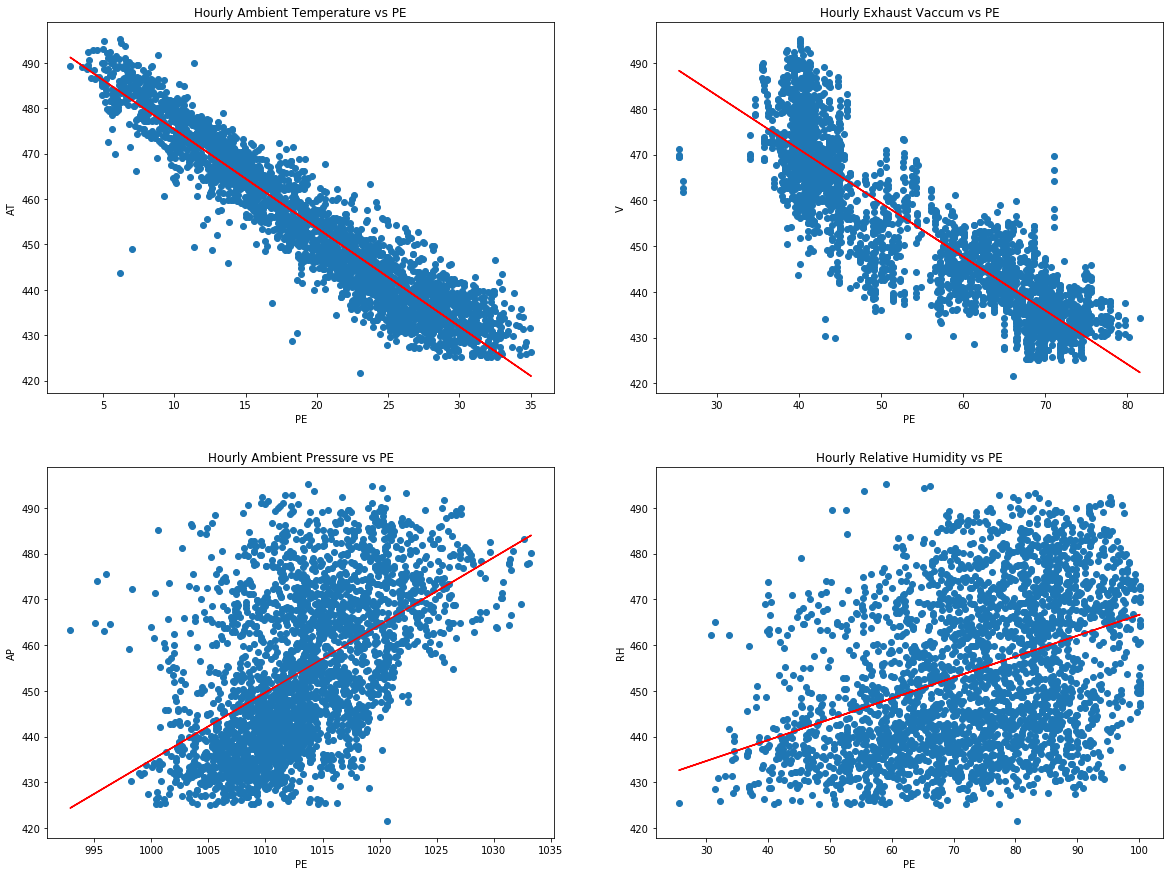

In [137]:
model = linear_regression()
model.train_test(train['x'],train['y'],test['x'],test['y'])